## 1. Problem Definition

> This model aims to detect and flag potential phishing emails

## 2. Data Set

> - The dataset is taken from Kaggle [https://www.kaggle.com/datasets/shashwatwork/phishing-dataset-for-machine-learning](https://www.kaggle.com/datasets/shashwatwork/phishing-dataset-for-machine-learning)
> - The dataset can also be found at [https://data.mendeley.com/datasets/h3cgnj8hft/1](https://data.mendeley.com/datasets/h3cgnj8hft/1)

## 3. Evaluation

> The evaluation metrics for this model will be accuracy, precision, recall and f1 score

## 4. Features

This dataset has following features:
- NumDots
- SubdomainLevel
- PathLevel
- UrlLength
- NumDash
- NumDashInHostname
- AtSymbol
- TildeSymbol
- NumUnderscore
- NumPercent
- NumQueryComponents
- NumAmpersand
- NumHash
- NumNumericChars
- NoHttps
- RandomString
- IpAddress
- DomainInSubdomains
- DomainInPaths
- HttpsInHostname
- HostnameLength
- PathLength
- QueryLength
- DoubleSlashInPath
- NumSensitiveWords
- EmbeddedBrandName
- PctExtHyperlinks
- PctExtResourceUrls
- ExtFavicon
- InsecureForms
- RelativeFormAction
- ExtFormAction
- AbnormalFormAction
- PctNullSelfRedirectHyperlinks
- FrequentDomainNameMismatch
- FakeLinkInStatusBar
- RightClickDisabled
- PopUpWindow
- SubmitInfoToEmail
- IframeOrFrame
- MissingTitle
- ImagesOnlyInForm
- SubdomainLevelRT
- UrlLengthRT
- PctExtResourceUrlsRT
- AbnormalExtFormActionR
- ExtMetaScriptLinkRT
- PctExtNullSelfRedirectHyperlinksRT

### 5.1 Standard Imports

In [1]:
#base imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#import models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#import for evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#import for storing model
from joblib import load, dump

### 5.2 Data Preprocessing

#### 5.2.1 Import Data

In [2]:
phishing_df = pd.read_csv("./data/Phishing_Legitimate_full.csv")
phishing_df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


#### 5.2.2 Checking for missing values

In [3]:
phishing_df.isna().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


#### 5.2.3 Splitting into dependent and target variable

In [4]:
x = phishing_df.drop(['id', 'CLASS_LABEL'], axis = 1)
y = phishing_df['CLASS_LABEL']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x, y

(      NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
 0           3               1          5         72        0   
 1           3               1          3        144        0   
 2           3               1          2         58        0   
 3           3               1          6         79        1   
 4           3               0          4         46        0   
 ...       ...             ...        ...        ...      ...   
 9995        3               1          1         50        0   
 9996        2               1          4         59        1   
 9997        2               1          4         57        0   
 9998        3               1          1         49        0   
 9999        3               1          2         52        3   
 
       NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
 0                     0         0            0              0           0   
 1                     0         0            0              2

### 5.3 Training Models

- Using KNeighborsClassifier estimator

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....................algorithm=brute, n_neighbors=9; total time=   0.0s
[CV] END .....................algorithm=brute, n_neighbors=9; total time=   0.0s
[CV] END .....................algorithm=brute, n_neighbors=9; total time=   0.0s
[CV] END .....................algorithm=brute, n_neighbors=9; total time=   0.0s
[CV] END .....................algorithm=brute, n_neighbors=9; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=7; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=7; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=7; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=7; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=7; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=9; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n

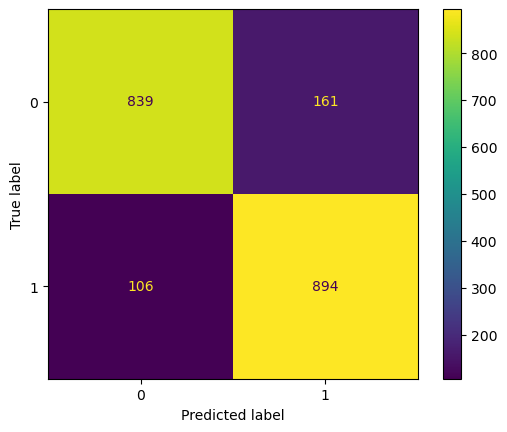

In [5]:
#random seed
np.random.seed(43)

#Hyper Parameters to use
hyperParameters = {
    "n_neighbors": [3, 5, 7, 9],
    "algorithm": ["ball_tree", "kd_tree", "brute"]
}

#Instantiating model
model = KNeighborsClassifier()
rs_KNeighborsModel = RandomizedSearchCV(model, hyperParameters, cv = 5, verbose = 2)

#Fitting data
rs_KNeighborsModel.fit(x_test, y_test)

#Making predictions
y_preds1 = rs_KNeighborsModel.predict(x_test)

#score of model
rs_KNeighborModel_score = rs_KNeighborsModel.score(x_test, y_test)
print(f"KNeighbor Classifier Model accuracy = {rs_KNeighborModel_score:.2f}")

#confusion matrix display 
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_preds1)
cm.figure_.savefig('./img/KNeighborsClassifier/confusion_matrix.png')

- Using Naive Bayes estimator

Naive Bayes Classifier Model accuracy = 0.84


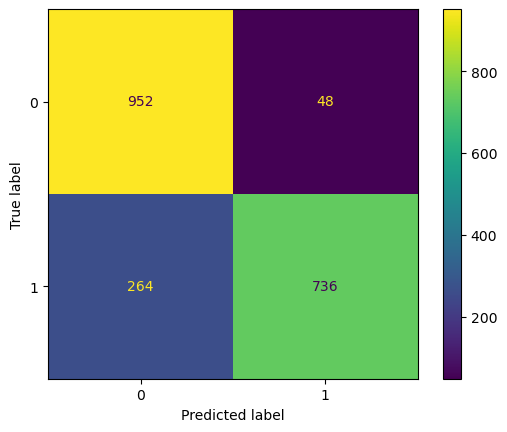

In [6]:
#random seed
np.random.seed(43)

#Instantiating model
model = GaussianNB()

#Fitting data
model.fit(x_test, y_test)

#Making predictions
y_preds2 = model.predict(x_test)

#score of model
model_score = model.score(x_test, y_test)
print(f"Naive Bayes Classifier Model accuracy = {model_score:.2f}")

#confusion matrix display 
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_preds2)
cm.figure_.savefig('./img/NaiveBayesClassifier/confusion_matrix.png')

- Using Random Forest estimator

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20

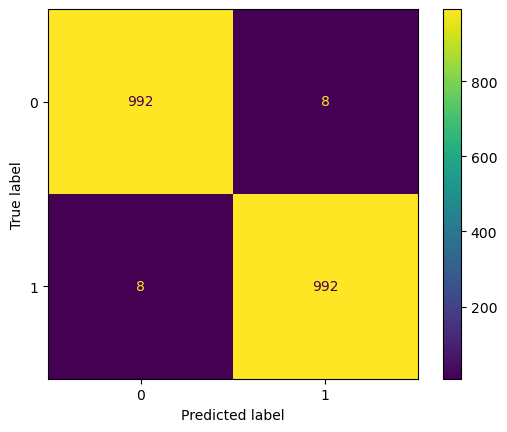

In [7]:
#random seed
np.random.seed(43)

#Hyper Parameters to use
hyperParameters = {
    "n_estimators": [10, 100, 200, 500, 1000],
    "max_depth": [None, 5, 10, 20],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]
}

#Instantiating model
model = RandomForestClassifier()
rs_RandomForestClassifier = RandomizedSearchCV(model, hyperParameters, cv = 5, verbose = 2)

#Fitting data
rs_RandomForestClassifier.fit(x_test, y_test)

#Making predictions
y_preds3 = rs_RandomForestClassifier.predict(x_test)

#score of model
rs_RandomForestClassifierModel_score = rs_RandomForestClassifier.score(x_test, y_test)
print(f"Random Forest Classifier Model accuracy = {rs_RandomForestClassifierModel_score:.2f}")

#confusion matrix display 
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_preds3)
cm.figure_.savefig('./img/RandomForestClassifier/confusion_matrix.png')

#### 6. Comparison

In [8]:
def evaluatePrediction(y_true, y_preds, estimator):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    print(estimator, classification_report(y_true, y_preds))
    return {"accuracy": round(accuracy, 2),
           "precision": round(precision, 2),
           "recall": round(recall, 2),
           "f1-score": round(f1, 2)}

KNeighbors Classifier               precision    recall  f1-score   support

           0       0.89      0.84      0.86      1000
           1       0.85      0.89      0.87      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000

Naive Bayes Classifier               precision    recall  f1-score   support

           0       0.78      0.95      0.86      1000
           1       0.94      0.74      0.83      1000

    accuracy                           0.84      2000
   macro avg       0.86      0.84      0.84      2000
weighted avg       0.86      0.84      0.84      2000

Random Forest Classifier               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.99      0.99      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weig

<Axes: >

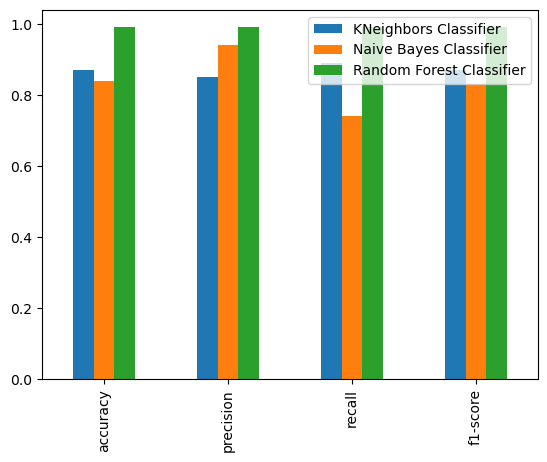

In [9]:
evaluate_metrics = pd.DataFrame({
    "KNeighbors Classifier": evaluatePrediction(y_test, y_preds1, "KNeighbors Classifier"),
    "Naive Bayes Classifier": evaluatePrediction(y_test, y_preds2, "Naive Bayes Classifier"),
    "Random Forest Classifier": evaluatePrediction(y_test, y_preds3, "Random Forest Classifier")
})
evaluate_metrics.plot.bar()

### 7. Save Models 

In [10]:
#KNeighbors Classifier
dump(rs_KNeighborsModel, filename = "model/KNeighborsClassifier.joblib")

# Naive Bayes Classifier
dump(model, filename = "model/NaiveBayesClassifier.joblib")

#Random Forest Classifier
dump(rs_RandomForestClassifier, filename = "model/RandomForestClassifier.joblib")

['model/RandomForestClassifier.joblib']